# Detecting potholes
@Benu Atri
Last modified 10-19-2020

### Problem Statement:

#### Why should we care?
A pothole is an oval/convex shaped depression in a paved surface like a road. Reseachers define the minimum dimension of a pothole as 150mm. Exposure to the elements such as heavy rains, sleet, ice, snow, and extreme heat cause structural damages to the paved roads. These events have increased in frequency with more climate change.
Unfortunately, these causes are aggravated by faulty construction and lack of oversight on the supervisors' part allowing low quality pavement material that is more prone to degradation and responsiveness or durability.

#### Potholes cause multiple types of damage
__Vehicular Harm:__  
Ranging from flat tires and wheel damages, impact and damage to lower part of the vehicle, braking system, and ultimately the life of the vehicle.
__Body Harm:__  
Potholes can cause drivers to suddenly lose control and have been shown to cause vehicle collisions, as well as major accidents. Additionally, personal injuries such as whiplash could also be sustained. This raises the risk of driving, along with increasing the medical costs in care and treatment. 

#### Rapid, and automated identification of potholes
To maintain a high quality driving experience and reduce the expenditure of hundreds of thousands of dollars, in medical costs, lawsuits, insurance payouts, as well as automotive repair, and constant servicing, we need an accurate and rapid method to detect potholes. 
#### Relationship between the images and the problem statement
The idea behind using 2D images for anomaly detection (such as a pothole) is to segment the image into edge/non-edge or defect/non-defect areas. Additionally, the textures of the images are compared in terms of coarse-ness and graininess of regions. The images with a larger value for the above 2 features, will be classified as a pothole.

#### Pothole detection using 2D images
I've hopefully established that pothole detection is critical in  determining the proper strategies of maintenance for safer driving conditions. Manual detection and evaluation is slow, and expensive. 

Several efforts (see References) have been made in this field. 
Here, I present a pothole detection method using ~300 training images collected from https://www.kaggle.com/virenbr11/pothole-and-plain-rode-images to train an Image Classifier, using the GPUs (p2.xlarge) available through Amazon's AWS. 

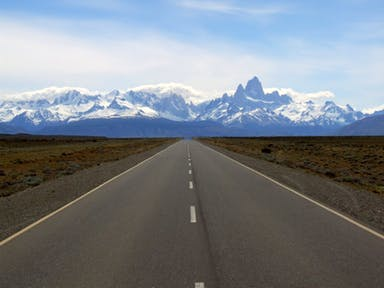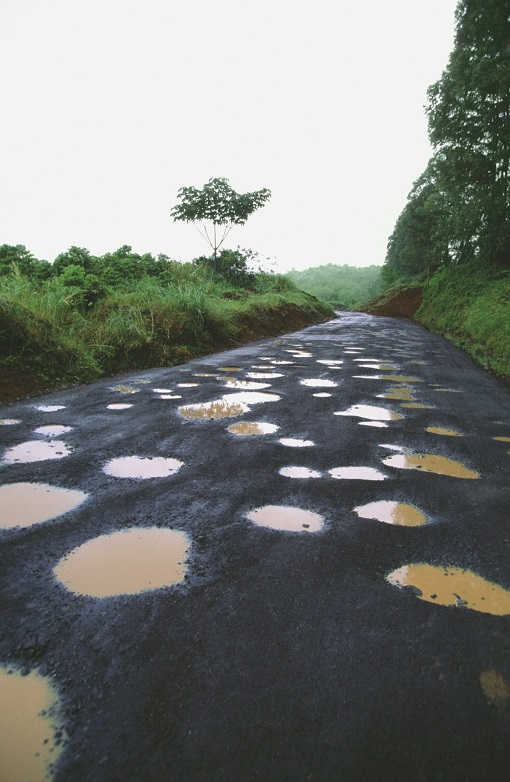

#### Data collection and data cleaning
The data was collected from Kaggle. Clean up was quite time consuming. I hope some of my tips here can help you save time in future.  
1.) Filter images manually to ensure there are no corrupt, empty, or incompatible files (such as .gif among a dataset of .jpegs).  
2.) Changing the resolution (optional) to make the images roughly same dimensions.  
3.) For high accuracy: curate images manually to make sure each image is what it says - e.g. looking at pothole_123.jpg to make sure it is an image of a road riddled with 1 or more potholes.  
4.) Make sure that erroneous hidden files such as .DS_Store are deleted. These files a e usually generated while using macOS.  
5.) The total number of files in the training images folders and the lst files should be the same. Mismatch will occur if you fail to re-execute the lst-generator script after you have made changes to the files of the image folders.  

**Note**: I did not curate the images for brightness, time of day, weather conditions etc. However, that could be a potential avenue for high quality data collection.

#### Preprocessing steps:  
Here is a brief list of the steps I performed:
- Create an AWS account and create an instance.
- Request a GPU of p2.xlarge size or more for your instance.
- Connect the S3 storage to the AWS instance.
- Open S3 services and upload the files. Folder tree is very important here.  

#### Feature Engineering
__Generating LST files__  
Using lst_generator.py, we create 2 separate files with the suffixes _train.lst_ and _test.lst_. A typical LST file contains a list of information, separated by line breaks. In our case, these lst files are a mapper between the images, a label assigned to them (0 or 1 for binary classification) and their relative path. 

#### Start a training job in Sagemaker 
- Training Job
    - using the pre-existing __ImageClassification__ model.
    - my parameters were: 
        - num_classes: 2, 
        - num_of_training_examples: 200, 
        - and memory: 60GB. (the classifier ran out of memory at 40GB)
            
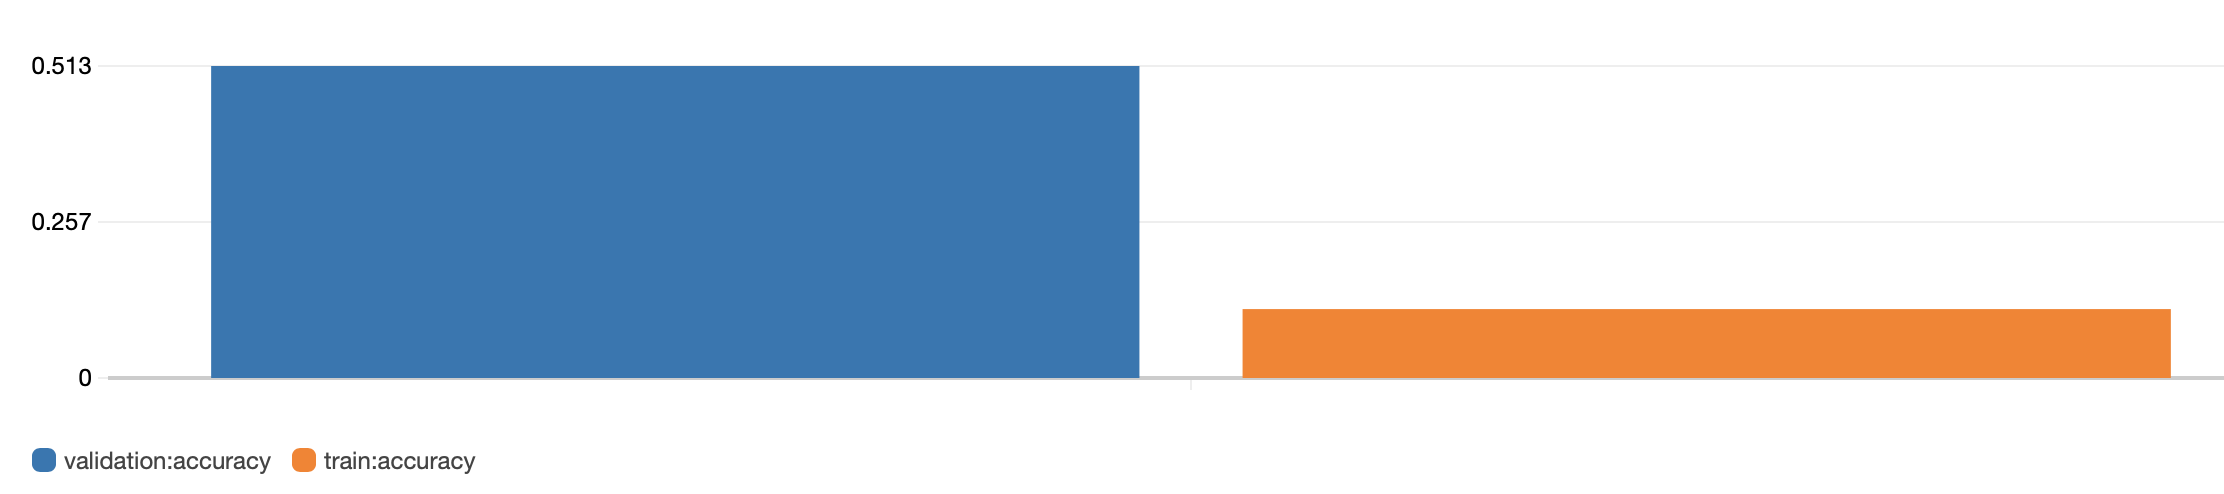 _The results of the 1st run. The training set has lower accuracy than test set. This result should concern you. This indicates that somehow either only one class is being 100% correctly predicted or there is a bias towards one or the other class in the training set_ 
A confusion matrix should help clear this

The accuracy of classification is not very high. More work is needed.

The remaining steps of creating a complete end-to-end AWS microservice are as follows:
- Create model
Used the default Sagemaker settings to create a model once the training job was over - took 23minutes
- Create an endpoint
Other than the name fields, I kept the default settings for creating an endpoint as well. Takes a small amount of time.
- Lambda function (provided on request)
- Create an IAM role for Lambda and a test event with a base64 type of images
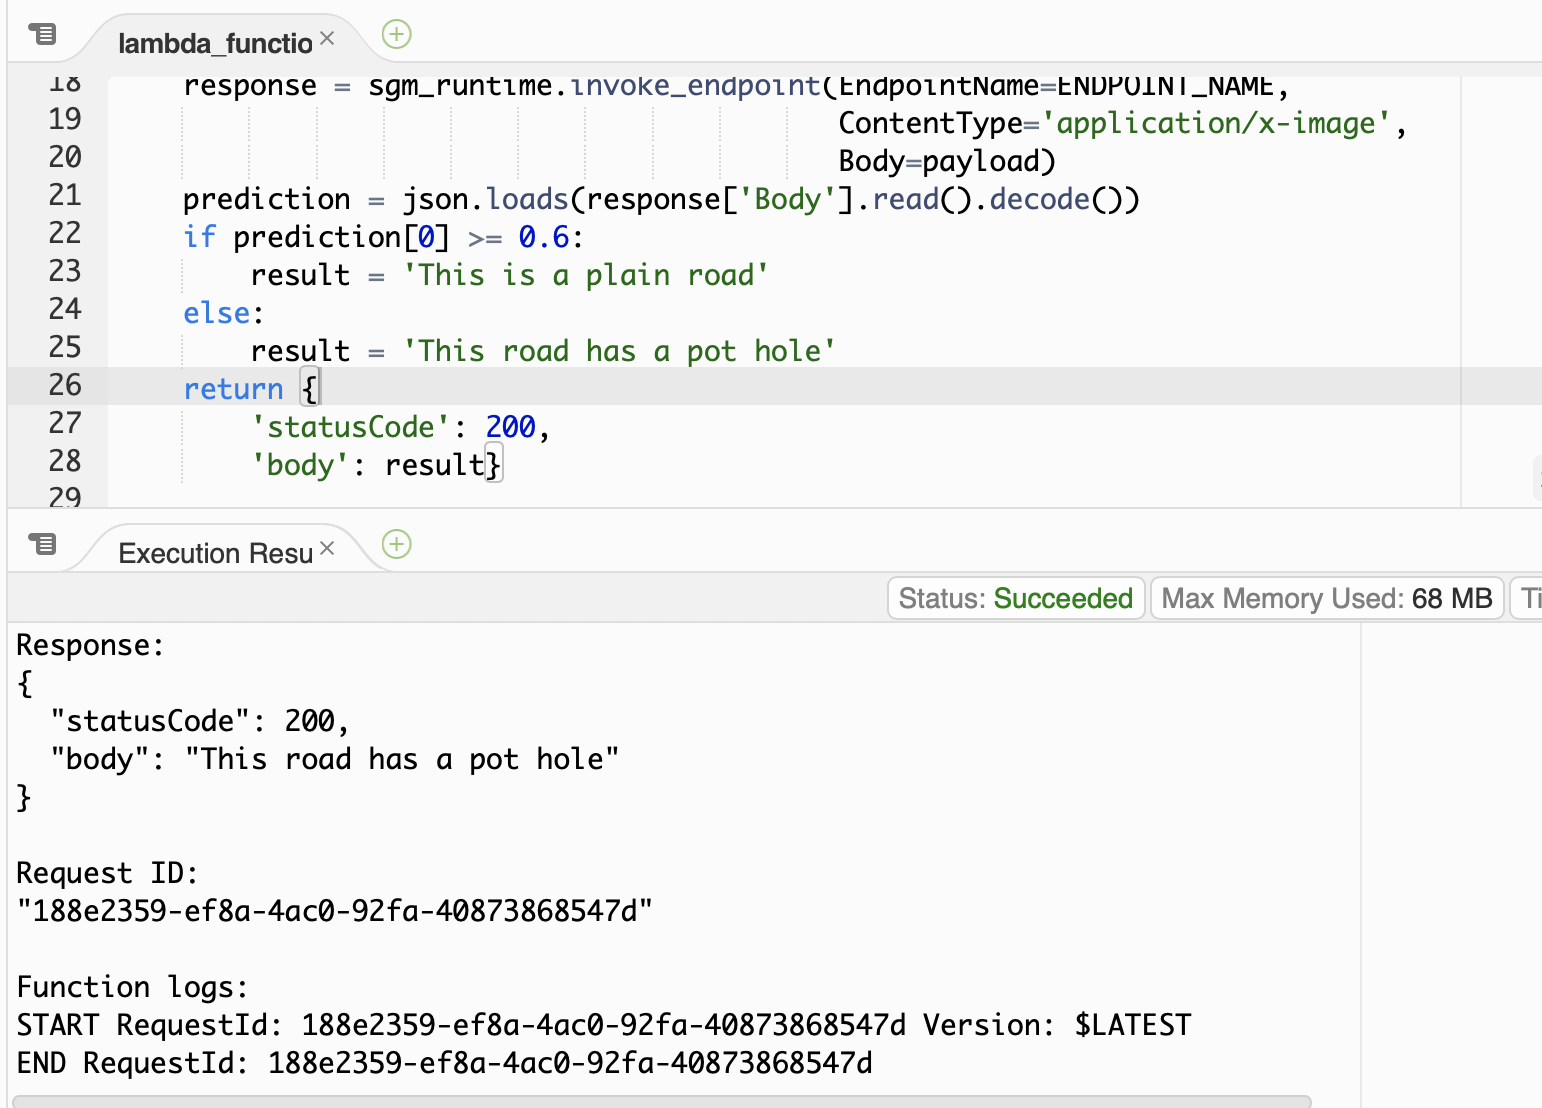 _Results of the test run after creation of an endpoint accessible by an IAM role_

- Create an API Gateway on AWS and finally create a POST function for the link to the 'url' to be invoked externally. I used POSTMAN. Curl can also be used.

__Conclusion:__
This work demonstrates the creation of a complete end-to-end AWS classification microservice. The trained model can be used to classify (at the moment, the accuracy is not reliable) images of potholes and plain roads.

Additional resources will be needed to improve this method. One way is to use video recording data as was done by https://www.researchgate.net/publication/279538022_Detecting_Potholes_Using_Simple_Image_Processing_Techniques_and_Real-World_Footage

__References:__
1.	Seung-Ki Ryu, Taehyeong Kim, Young-Ro Kim, "Image-Based Pothole Detection System for ITS Service and Road Management System", Mathematical Problems in Engineering, vol. 2015, Article ID 968361, 10 pages, 2015.https://doi.org/10.1155/2015/968361
2.	Review and Analysis of Pothole Detection Methods, Taehyeong Kim, Seung-Ki Ryu https://www.hindawi.com/journals/mpe/2015/968361/
3. A very, very special thank you to Ms. Sindhu Ghanta, and Ms. Yamuna Dulanjani at AICAMP for sharing their superior knowledge, guidance, and assistance.